# Testing Entanglement Measures on a Random Clifford State

This notebook is used to document tests of entanglement measures (in `Measurements.jl`) on a random Clifford state.


In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

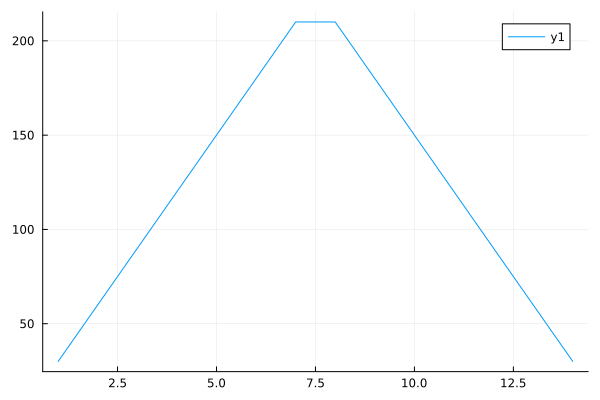

In [2]:
L = 15
d = 3
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d)
state = MixedDestabilizer(random_stabilizer(system.nbits))

n_subdiv = 11
subdiv_array = []
for i_sub in 1:(n_subdiv - 1)
    push!(subdiv_array, round(Int, system.L * i_sub / n_subdiv))
end
subdiv_array = Integer.(subdiv_array)

ee_array = entanglement_entropy_cut(state, system, n_subdiv)
plot(subdiv_array, ee_array)

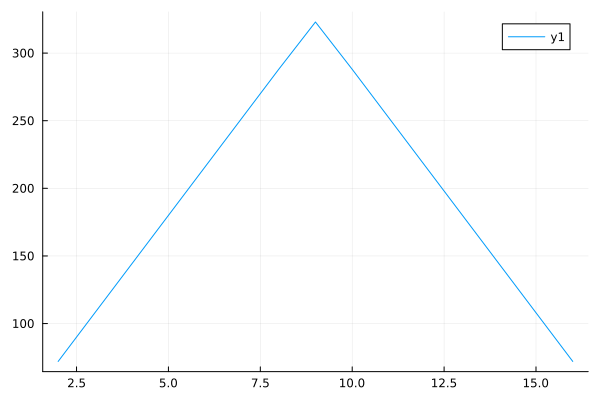

In [3]:
L = 18
d = 3
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d)
state = MixedDestabilizer(random_stabilizer(system.nbits))

n_subdiv = 12
subdiv_array = []
for i_sub in 1:(n_subdiv - 1)
    push!(subdiv_array, round(Int, system.L * i_sub / n_subdiv))
end
subdiv_array = Integer.(subdiv_array)

ee_array = entanglement_entropy_cut(state, system, n_subdiv)
plot(subdiv_array, ee_array)